# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [70]:
# Configurable constants
subreddit = "The_B_Emoji"
download_date_string = "19.12.04-09:28:30"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [71]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,281,aag3pi,Mods_are_gay42069,1.546043e+09,8,🅱️,🅱️,The_B_Emoji,2018-12-29 00:25:14,🅱️🅱️,{'🅱️🅱️': 1.0},0.000000,NaN,13.270256,NaN,13.269743,NaN,NaN
1,280,aagdcr,skelly46,1.546045e+09,6,Let's Get It,Let's get this 🅱️read 🅱️ois,The_B_Emoji,2018-12-29 00:58:13,Let's get this 🅱️read 🅱️ois Let's Get It,"{""Let's"": 0.25, 'get': 0.125, 'this': 0.125, '...",2.750000,10.536195,8.279211,NaN,9.815107,2.256985,NaN
2,279,ajczbx,HeraldOfTheDankWeb,1.548340e+09,91,Post whatever the fuck you want.,"This will probably turn out bad, but who gives...",The_B_Emoji,2019-01-24 14:33:41,"This will probably turn out bad, but who gives...","{'This': 0.047619047619047616, 'will': 0.04761...",4.392317,7.908433,8.896059,NaN,8.695821,-0.987626,NaN
3,278,ajd8gx,retro_gatling,1.548342e+09,4,cringe,NaN,The_B_Emoji,2019-01-24 15:01:28,cringe,{'cringe': 1.0},0.000000,13.238343,13.282454,NaN,13.270994,-0.044111,NaN
4,277,ajd97x,pinballmanfan,1.548342e+09,16,epic title,NaN,The_B_Emoji,2019-01-24 15:03:38,epic title,"{'epic': 0.5, 'title': 0.5}",1.000000,12.285299,12.273350,NaN,12.272318,0.011950,NaN


In [72]:
# a version of submissions without nan or infinite values
safe_submissions = submissions \
    .drop('body', axis=1) \
    .replace(np.inf, np.nan) \
    .replace(-np.inf, np.nan) \
    .dropna()

In [73]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
-San-Holo-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,22.0,0.001550
ATangerineMann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.000000,2.0,7.0,0.001550
AirHamyes,1.0,24.0,24.000000,24.0,88.000000,-0.619726,8.758637,9.378363,0.310674,9.123627,8.812953,NaN,NaN,NaN,NaN,NaN,0.006448
An_Und3adMann,1.0,10.0,10.000000,10.0,2.000000,-0.991175,2.577601,3.568776,-0.203295,11.130742,11.334037,NaN,NaN,NaN,NaN,NaN,0.001550
Andes1te,9.0,27.0,11.111111,4.0,52.444444,-0.295849,10.330189,10.626038,0.030794,10.638096,10.607302,6.0,3.0,2.333333,2.0,15.5,0.019543


In [74]:
# a last minute adjustment
users['ln_pagerank'] = users['pagerank'].apply(np.log)
users['ln_num_posts'] = users['num_posts'].apply(np.log)
users['ln_mean_length_submissions'] = users['mean_length_submissions'].apply(np.log)
users['ln_mean_score_submissions'] = users['mean_score_submissions'].apply(np.log)

In [75]:
# a version of users without nans (removes a lot of comment info)
safe_users = users \
    .drop('num_comments', axis=1) \
    .drop('max_score_comments', axis=1) \
    .drop('mean_score_comments', axis=1) \
    .drop('min_score_comments', axis=1) \
    .drop('mean_length_comments', axis=1) \
    .dropna()
safe_users = safe_users[np.isfinite(safe_users).all(1)] # drop infinites as well

## Exploritory Data Analysis
Lets get a feel for the data

### Exploring Submissions

#### Simple Histograms

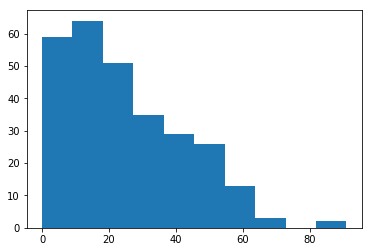

In [76]:
plt.hist(submissions['score'])
plt.show()

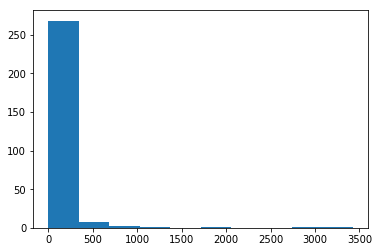

In [77]:
plt.hist(submissions['content'].apply(len))
plt.show()

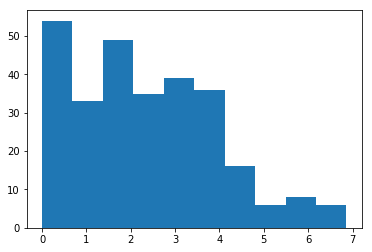

In [78]:
plt.hist(submissions['entropy'])
plt.show()

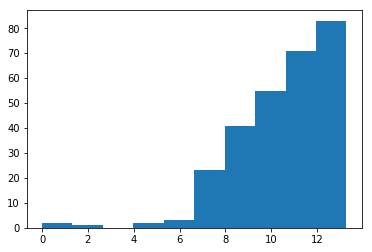

In [79]:
plt.hist(submissions['novelty'])
plt.show()

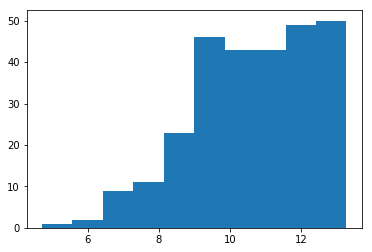

In [80]:
plt.hist(submissions['novelty_5'])
plt.show()

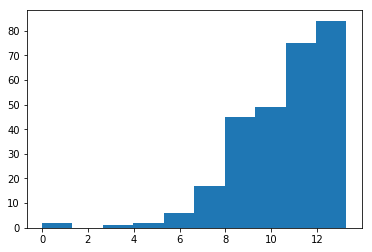

In [81]:
plt.hist(submissions['transience'])
plt.show()

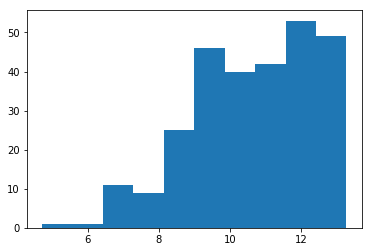

In [82]:
plt.hist(submissions['transience_5'])
plt.show()

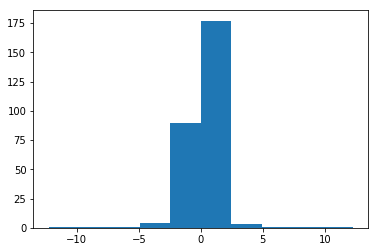

In [83]:
plt.hist(submissions['impact'])
plt.show()

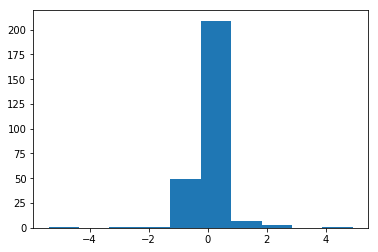

In [84]:
plt.hist(submissions['impact_5'])
plt.show()

#### Submission Scatterplots

slope: -0.004976683547907272
intercept: 25.667459712991946
r: -0.09258547876712155
r-squared: 0.008572070878537114
standard error: 0.003300272873734868


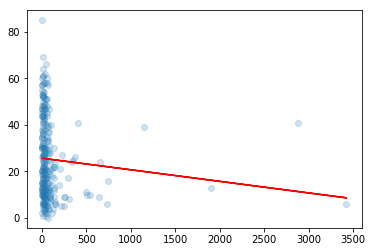

In [85]:
# scatterplot
x = safe_submissions['content'].apply(len)
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

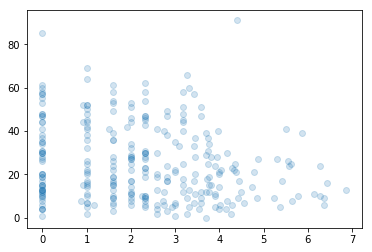

In [86]:
plt.scatter(x=submissions['entropy'], y=submissions['score'], alpha=0.2)

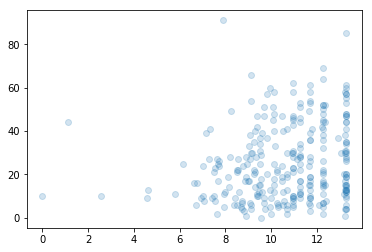

In [87]:
plt.scatter(x=submissions['novelty'], y=submissions['score'], alpha=0.2)
plt.show()

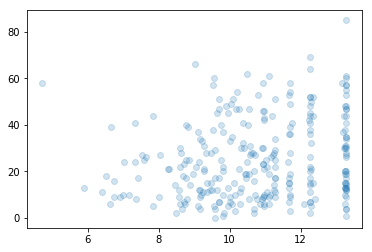

In [88]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'], alpha=0.2)
plt.show()

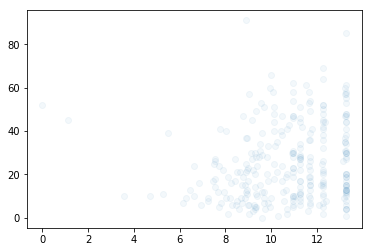

In [89]:
plt.scatter(x=submissions['transience'], y=submissions['score'], alpha=0.05)
plt.show()

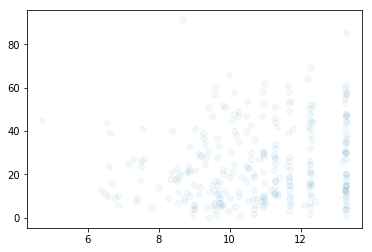

In [90]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'], alpha=0.05)
plt.show()

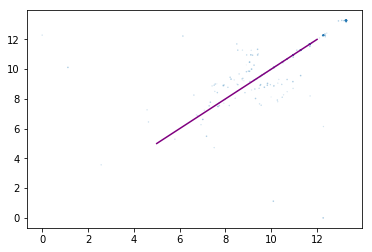

In [91]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

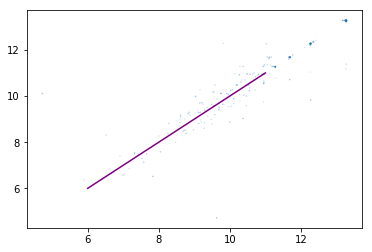

In [92]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(6, 12)
plt.plot(domain, domain, color='purple')

plt.show()

slope: 0.5221058026218712
intercept: 25.190574805795652
r: 0.04990267594747473
r-squared: 0.002490277066718673
standard error: 0.6443404260061585


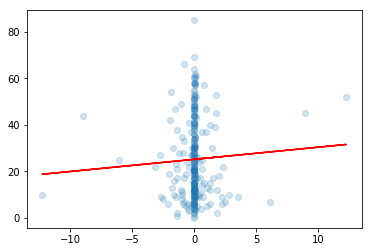

In [93]:
# scatterplot
x = safe_submissions['impact']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

slope: -0.6022682953657246
intercept: 25.16886887492825
r: -0.02247455885083206
r-squared: 0.0005051057955395137
standard error: 1.6520045591546964


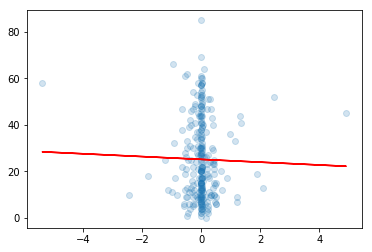

In [94]:
# scatterplot
x = safe_submissions['impact_5']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

### Exploring Users

#### Simple Histograms

In [95]:
# helper to make this less redundant
def user_hist(column_name):
    plt.hist(users[column_name])
    plt.title("users " + column_name)
    plt.show()

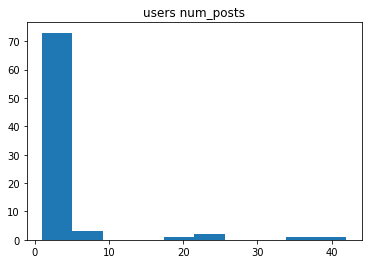

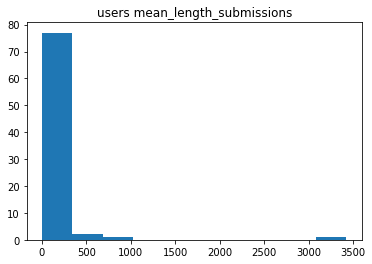

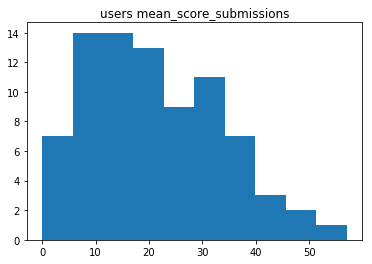

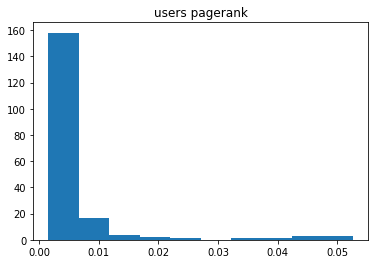

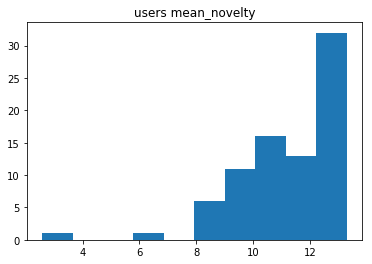

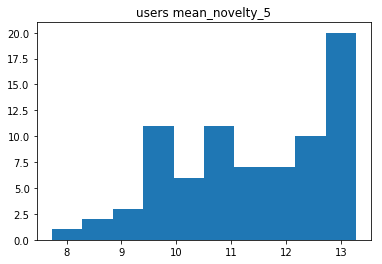

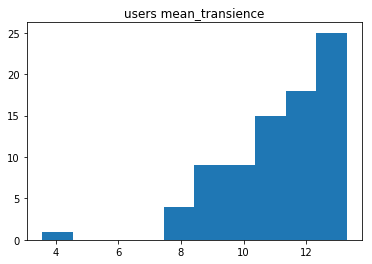

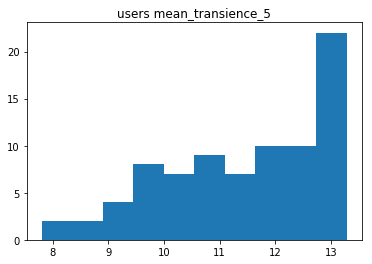

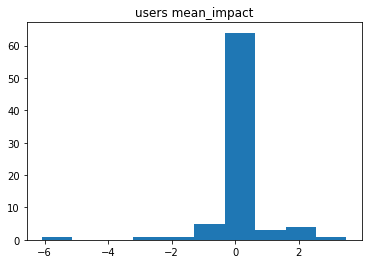

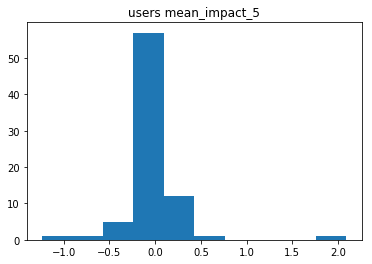

In [96]:
user_hist('num_posts')
user_hist('mean_length_submissions')
user_hist('mean_score_submissions')
user_hist('pagerank')
user_hist('mean_novelty')
user_hist('mean_novelty_5')
user_hist('mean_transience')
user_hist('mean_transience_5')
user_hist('mean_impact')
user_hist('mean_impact_5')

#### User Scatterplots

In [97]:
# a scatterplot and regression helper function
def user_scatter(x_col, y_col, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

    # best fit line
    m, b, r, p, std_err = stats.linregress(x, y)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("slope: " + str(m))
    print("intercept: " + str(b))
    print("r: " + str(r))
    print("r-squared: " + str(r**2))
    print("p: " + str(p))
    print("standard error: " + str(std_err))
    plt.plot(x, b + m * x, color="red")
    plt.title("users " + y_col + " vs " + x_col)

    plt.show()

In [98]:
safe_users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'pagerank', 'ln_pagerank', 'ln_num_posts',
       'ln_mean_length_submissions', 'ln_mean_score_submissions'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.0013275137538802707
intercept: 0.005463796070821171
r: 0.7269377999980957
r-squared: 0.5284385650660715
p: 7.149098116733807e-14
standard error: 0.0001448039089244854


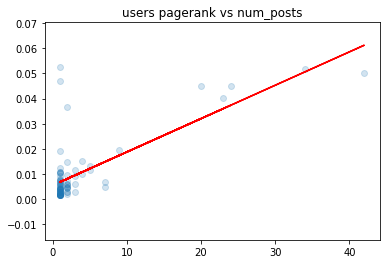

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00012237014312587658
intercept: 0.007480464796713153
r: 0.11486739639336499
r-squared: 0.01319451875419044
p: 0.3198489729902763
standard error: 0.00012219792615898945


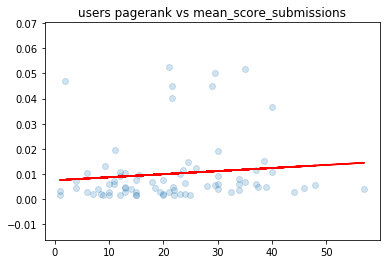

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -1.111832083533418e-06
intercept: 0.01025035229332069
r: -0.034266895009848454
r-squared: 0.0011742200936159769
p: 0.7673374044693525
standard error: 3.744369404822005e-06


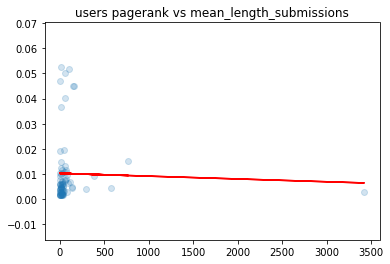

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.000497621885531167
intercept: 0.015722101575742563
r: -0.0722949093874078
r-squared: 0.005226553923333505
p: 0.5320843265598156
standard error: 0.0007927262053763204


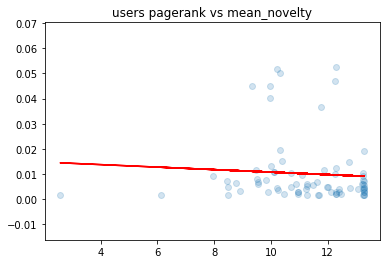

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0015792633520101752
intercept: 0.02818100366458256
r: -0.17546845276270093
r-squared: 0.030789177914936208
p: 0.12690669061627957
standard error: 0.001023137508825436


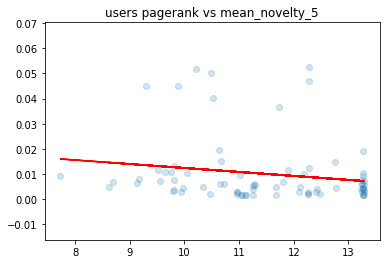

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0005836028617324871
intercept: 0.016696751089733876
r: -0.0834408307907332
r-squared: 0.006962372243047769
p: 0.4706179915510075
standard error: 0.0008048056451928574


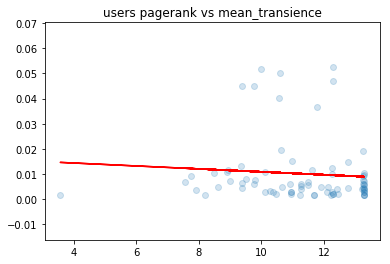

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0016737848121012944
intercept: 0.02930244675175713
r: -0.18677296221957831
r-squared: 0.03488413941627603
p: 0.10385049255588791
standard error: 0.0010165873722472632


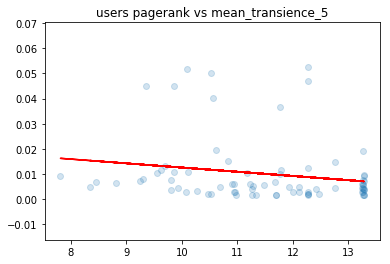

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00020399080182313122
intercept: 0.010133506647268704
r: 0.016611376170637362
r-squared: 0.0002759378182824188
p: 0.8859822398709978
standard error: 0.0014177981745019871


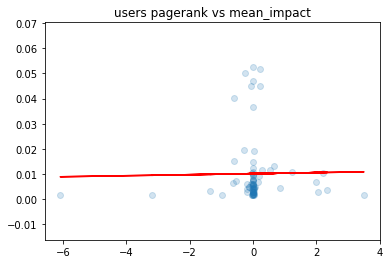

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.0010874512438770376
intercept: 0.010133246882950558
r: 0.027684380415264803
r-squared: 0.0007664249189770974
p: 0.8111041886639627
standard error: 0.004533961870471409


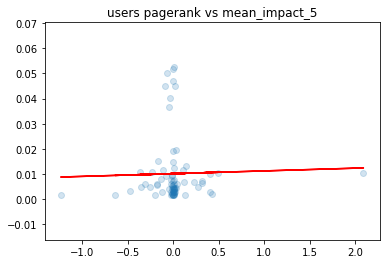

In [99]:
user_scatter('num_posts', 'pagerank')
user_scatter('mean_score_submissions', 'pagerank')
user_scatter('mean_length_submissions', 'pagerank')
user_scatter('mean_novelty', 'pagerank')
user_scatter('mean_novelty_5', 'pagerank')
user_scatter('mean_transience', 'pagerank')
user_scatter('mean_transience_5', 'pagerank')
user_scatter('mean_impact', 'pagerank')
user_scatter('mean_impact_5', 'pagerank')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.633994167419472
intercept: -5.470422608271051
r: 0.6067576962520255
r-squared: 0.3681549019610652
p: 4.939013918748209e-09
standard error: 0.09590575030703334


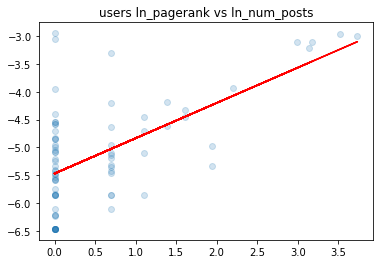

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.21899014410500298
intercept: -5.743271272694892
r: 0.18010185372019835
r-squared: 0.032436677713451725
p: 0.11702486279287701
standard error: 0.1381069242652741


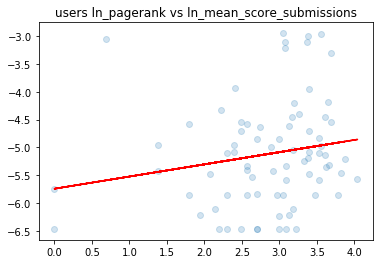

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.1404771379502271
intercept: -5.557407996827971
r: 0.22553054930333552
r-squared: 0.050864028669064254
p: 0.04859350425144317
standard error: 0.07007028075031299


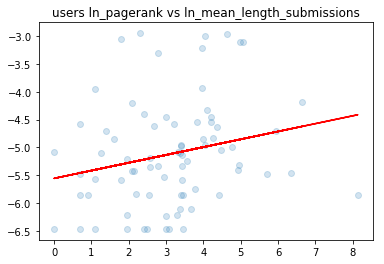

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.013736192903742006
intercept: -4.964214979651443
r: -0.027009174481723953
r-squared: 0.0007294955061842083
p: 0.8156289915184547
standard error: 0.058703767356194606


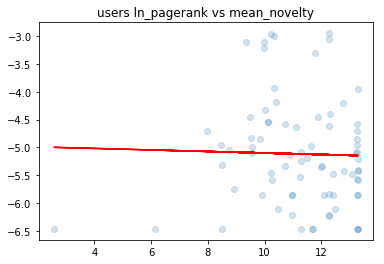

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.15170190934294964
intercept: -3.38503008947215
r: -0.22812465246020253
r-squared: 0.05204085706008819
p: 0.04599500453011044
standard error: 0.07476236046661718


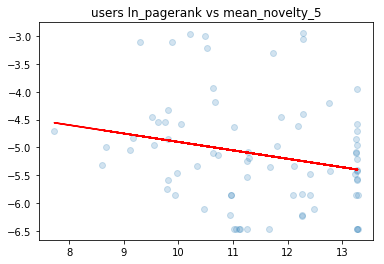

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.04294596906385051
intercept: -4.635619516163603
r: -0.08310368804106744
r-squared: 0.006906222966027054
p: 0.47241907429277286
standard error: 0.05946570989421465


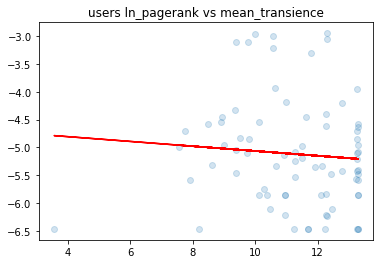

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.16622397541595765
intercept: -3.214984204008976
r: -0.2510410442082981
r-squared: 0.06302160587719267
p: 0.027648257998220006
standard error: 0.07400875332254797


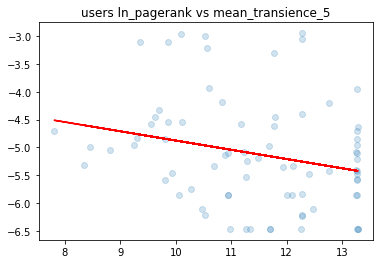

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.10090054724046414
intercept: -5.1196241288785025
r: 0.11120523539689944
r-squared: 0.012366604379679817
p: 0.33562192135044167
standard error: 0.10412033087623623


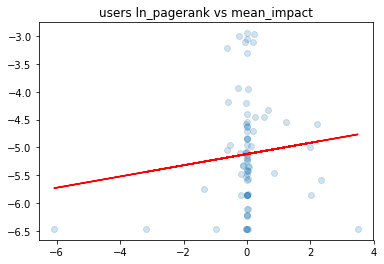

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.3898022491393046
intercept: -5.119383849243197
r: 0.13430928545640494
r-squared: 0.01803898415981007
p: 0.24419405170718603
standard error: 0.3320892318303803


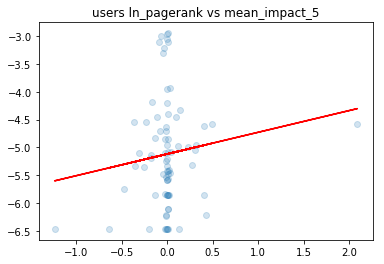

In [100]:
user_scatter('ln_num_posts', 'ln_pagerank')
user_scatter('ln_mean_score_submissions', 'ln_pagerank')
user_scatter('ln_mean_length_submissions', 'ln_pagerank')
user_scatter('mean_novelty', 'ln_pagerank')
user_scatter('mean_novelty_5', 'ln_pagerank')
user_scatter('mean_transience', 'ln_pagerank')
user_scatter('mean_transience_5', 'ln_pagerank')
user_scatter('mean_impact', 'ln_pagerank')
user_scatter('mean_impact_5', 'ln_pagerank')

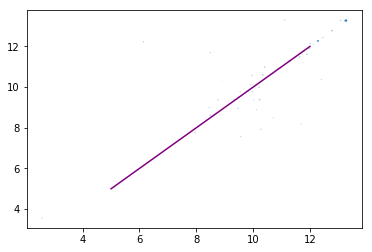

In [101]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

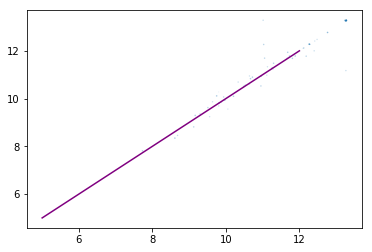

In [102]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

### Graphs for Paper

In [105]:
# helper to make this less redundant
def user_hist_paper(column_name, x_title, y_title, graph_title):
    plt.hist(users[column_name])
    plt.title(graph_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

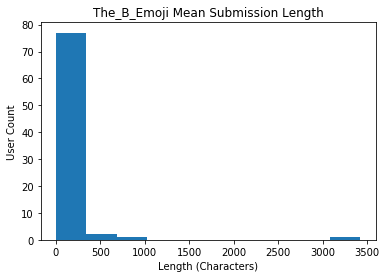

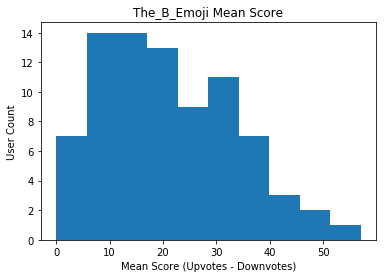

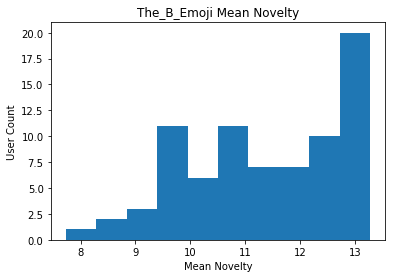

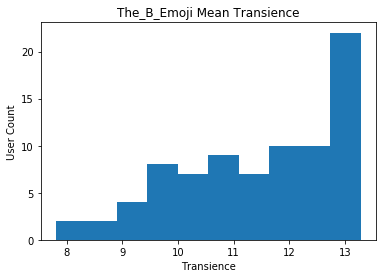

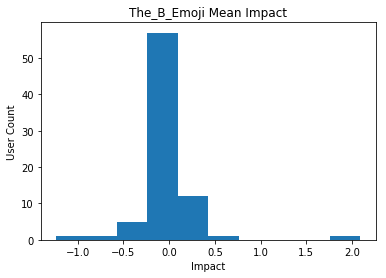

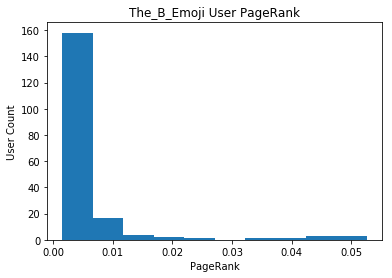

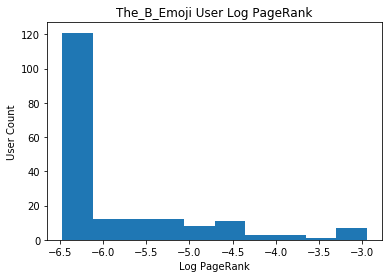

In [107]:
user_hist_paper("mean_length_submissions","Length (Characters)","User Count", subreddit + " Mean Submission Length")
user_hist_paper("mean_score_submissions","Mean Score (Upvotes - Downvotes)","User Count", subreddit + " Mean Score")
user_hist_paper("mean_novelty_5","Mean Novelty","User Count", subreddit + " Mean Novelty")
user_hist_paper("mean_transience_5","Transience","User Count", subreddit + " Mean Transience")
user_hist_paper("mean_impact_5","Impact","User Count", subreddit + " Mean Impact")
user_hist_paper("pagerank","PageRank","User Count", subreddit + " User PageRank")
user_hist_paper("ln_pagerank","Log PageRank","User Count", subreddit + " User Log PageRank")